In [ ]:
# importing useful Python Libraries 
import matplotlib.pyplot as plt
import cv2
import numpy as np
import seaborn as sns

import functools as ft
import itertools as it
import operator as op

import os
import glob 
import os.path as osp

# Import the statistical learning/machine learning related libraries 
from sklearn import (cluster, datasets, decomposition,
                     metrics,
                     model_selection as skms, 
                     neighbors, pipeline, svm, 
                     preprocessing as skpre)

In [ ]:
import utilities

from utilities import my_show, my_gshow, my_read, my_read_g, my_read_cg, size_me

In [ ]:
%matplotlib inline

In [ ]:
def cm_helper(ax, actual, predicted): 
    cm = metrics.confusion_matrix(actual, predicted) #it accepts two lists, one with the actual data and one with the predicted 

    sns.heatmap(cm, annot=True, fmt='3d', ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

np.random.seed(42)

In [ ]:
# Load the digits dataset. This dataset is from the sklearn library 
digits= datasets.load_digits()

In [ ]:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [ ]:
#Description of the dataset 
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
# Data content on the digits dataset 
print(digits.data)


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [ ]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [ ]:
# Find the dimension on the digits dataset 
digits.data.shape
#There are 1,797 samples and each sample contains 64 attributes (8X8 image)

(1797, 64)

In [ ]:
# If you want to access the first example of the dataset 
digits.data[0]
#Here the result is an array with 64 elements. Each element contains a number that goes from 0 to 16 indicating the "color" of that particular pixel. 
#Those 64 pixels form an 8X8 image. Therefore, the digits dataset has 1797 arrays just like this one.

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
# Target the values of the dataset
print(digits.target) #this will give you what the image actually is meaning the first image is a 0, the second is a 1....
len(digits.target)

[0 1 2 ... 8 9 8]


1797

In [ ]:
# Displays the names of the possible targets (digits 0-9)
print(digits.target_names) #target_names represents the classes (those are the possible values that each image can contain)

[0 1 2 3 4 5 6 7 8 9]


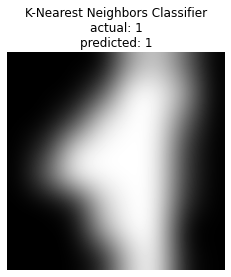

In [ ]:
#Load data
digits=datasets.load_digits()

#Simplify some names and manipulate the shape of the data 
#Number of samples
n_examples=len(digits.images)

#Data and target 
data = digits.images.reshape(n_examples, -1) #N rows, rest is flattened. 
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix: 
tgts = digits.target

#Set the seed for reproducibility 
np.random.seed(55)

#Split the data into train/test sets 
(data_train, data_tst, 
  tgts_train, tgts_tst) = skms.train_test_split(data,tgts, test_size =.2) 
#so 80% of the data is being used for training
#and 20% is being used in the test split




param_grid = {'n_neighbors' : [n for n in range(1,10)]}   #We are using this find the optimal number of neighbors
model = skms.GridSearchCV(neighbors.KNeighborsClassifier(),
                          param_grid,
                          n_jobs=-1).fit(data_train, tgts_train)

model.best_params_['n_neighbors']
#create and fit model 

knn_classifier=neighbors.KNeighborsClassifier(n_neighbors=model.best_params_['n_neighbors']) #knn_classifier
knn_classifier.fit(data_train, tgts_train)                   #returns a list in which the rows are queries and columns are neighbors  

#Predict and evaluate result for the first test case 
predicted = knn_classifier.predict(data_tst[0:1,:])[0] #this is to test on 2D
                                                       #the second colon is determining that the function is fetching everything less than 1 and greater than zero
actual = tgts_tst[0]

my_gshow(plt.gca(), data_tst[0].reshape(8,8)) #My g show is being used to plot the image. At this point we are reshaping the data(which was initially flattened) to an 8x8 again
plt.gca().set_title("K-Nearest Neighbors Classifier\nactual: {}\npredicted: {}".format(actual,predicted)); 

In [ ]:
param_grid = {'n_neighbors' : [n for n in range(1,10,2)]}
model = skms.GridSearchCV(neighbors.KNeighborsClassifier(),
                          param_grid,
                          n_jobs=-1).fit(data_train, tgts_train)

model.best_params_['n_neighbors']

1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.94      1.00      0.97        33
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        44
           4       0.97      1.00      0.98        31
           5       0.96      1.00      0.98        43
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        44
           8       1.00      1.00      1.00        28
           9       1.00      0.89      0.94        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



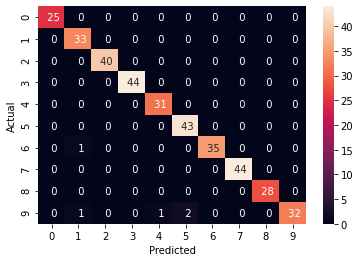

In [ ]:
#Make predictions for the entire test set and see how the model performed 
predicted=knn_classifier.predict(data_tst) #Here we are moving to an analysis of the entire dataset 

#Classification report that displays percision, recall, f1-score, and support for each class 
report=metrics.classification_report(tgts_tst, predicted)
print(report)

#Display confusion matrix
cm_helper(plt.gca(), tgts_tst, predicted)

 


In [ ]:
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn import svm 
digits=datasets.load_digits()

In [ ]:
param_grid = {'C'     : np.logspace(-1, 5, 8), 
              'gamma' : np.logspace(-5, -2, 3)}

 

model = skms.GridSearchCV(svm.SVC(class_weight='balanced'),
                          param_grid).fit(data_train, tgts_train)
    

In [ ]:
model.best_params_["C"]
model.best_params_["gamma"]

0.00031622776601683794

In [ ]:
clf=svm.SVC(gamma=model.best_params_["gamma"], C=model.best_params_["C"])
X,y=data_train,tgts_train
clf.fit(X,y)


SVC(C=5.17947467923121, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.00031622776601683794, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

Prediction: 9


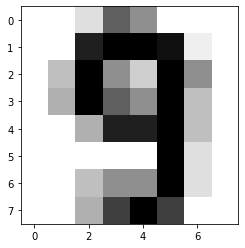

In [ ]:
print('Prediction:',clf.predict(digits.data)[-2])
plt.imshow(digits.images[-2], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        40
           3       1.00      0.95      0.98        44
           4       1.00      1.00      1.00        31
           5       0.98      1.00      0.99        43
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        44
           8       0.93      1.00      0.97        28
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



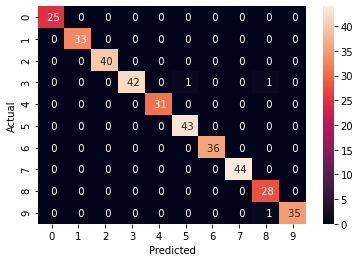

In [ ]:
[]#Make predictions for the entire test set and see how the model performed 
predicted=clf.predict(data_tst) #Here we are moving to an analysis of the entire dataset 

#Classification report that displays percision, recall, f1-score, and support for each class 
report=metrics.classification_report(tgts_tst, predicted)
print(report)

#Display confusion matrix
cm_helper(plt.gca(), tgts_tst, predicted)

In [ ]:
param_grid = {'pca__n_components' : [10, 20, 30, 40, 50, 60, 70, 80, 90,99],
              'svc__C'     : np.logspace(-1, 5, 8),
              'svc__gamma' : np.logspace(-5, -2, 3)}

In [ ]:
pipe = pipeline.make_pipeline(decomposition.PCA(svd_solver='randomized',
                                                whiten=True), 
                              svm.SVC(class_weight='balanced'))

 

model = skms.GridSearchCV(pipe, param_grid, 
                          n_jobs=-1).fit(data_train, tgts_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        40
           3       1.00      0.95      0.98        44
           4       1.00      1.00      1.00        31
           5       0.98      1.00      0.99        43
           6       1.00      1.00      1.00        36
           7       0.98      1.00      0.99        44
           8       0.93      0.96      0.95        28
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



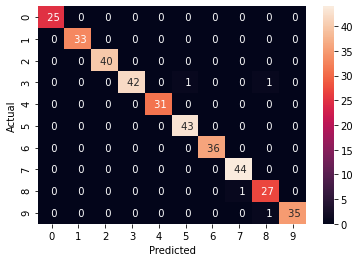

In [ ]:
[]#Make predictions for the entire test set and see how the model performed 
predicted=model.predict(data_tst) #Here we are moving to an analysis of the entire dataset 

#Classification report that displays percision, recall, f1-score, and support for each class 
report=metrics.classification_report(tgts_tst, predicted)
print(report)

#Display confusion matrix
cm_helper(plt.gca(), tgts_tst, predicted)

In [ ]:
#For each one of the three parts of the code, we essentially took five steps (listed below)
#1-Cross validation
#2-Finding the best parameters using the grid search 
#3-Testing (split in trainning and test )
#4-Report 
#5-Confusion matrix 